In [1]:
import pandas as pd



import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Resampling 
from sklearn.utils import resample


In [12]:
AC= pd.read_csv('nasa.csv')
AC.describe().T
AC.head().T

,0,1,2,3,4
Neo Reference ID,3703080,3723955,2446862,3092506,3514799
Name,3703080,3723955,2446862,3092506,3514799
Absolute Magnitude,21.6,21.3,20.3,27.4,21.6
Est Dia in KM(min),0.12722,0.146068,0.231502,0.008801,0.12722
Est Dia in KM(max),0.284472,0.326618,0.517654,0.019681,0.284472
Est Dia in M(min),127.219879,146.067964,231.502122,8.801465,127.219879
Est Dia in M(max),284.472297,326.617897,517.654482,19.680675,284.472297
Est Dia in Miles(min),0.079051,0.090762,0.143849,0.005469,0.079051
Est Dia in Miles(max),0.176763,0.202951,0.321655,0.012229,0.176763
Est Dia in Feet(min),417.388066,479.22562,759.521423,28.876199,417.388066


In [3]:
AC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [4]:
jupiter_copy = AC.copy()
jupiter_copy['Hazardous'].value_counts() / len(jupiter_copy['Hazardous']) * 100

False    83.891615
True     16.108385
Name: Hazardous, dtype: float64

In [5]:
jupiter_copy['Hazardous']=jupiter_copy['Hazardous'].replace({True:1,False:-1})
jupiter_copy['Hazardous'].value_counts() / len(jupiter_copy['Hazardous']) * 100

-1    83.891615
 1    16.108385
Name: Hazardous, dtype: float64

In [6]:
labels = jupiter_copy.Hazardous

jupiter_copy.drop(columns="Hazardous", axis=1, inplace=True)

uranus_train, uranus_test, target_train, target_train_test = train_test_split(jupiter_copy, labels, test_size=0.3, random_state=42, stratify=labels)

uranus_train.shape, uranus_test.shape

((3280, 39), (1407, 39))

In [ ]:
target_train_test.value_counts() / len(target_train_test) * 100

C:\Users\DELL\AppData\Local\Temp\ipykernel_14972\358440320.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(uranus_train.corr(), dtype=bool))
C:\Users\DELL\AppData\Local\Temp\ipykernel_14972\358440320.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(uranus_train.corr().iloc[1:,:-1], mask=mask[1:,:-1], annot=True, fmt=".1g", linewidths=2.0, annot_kws={"size": 10})


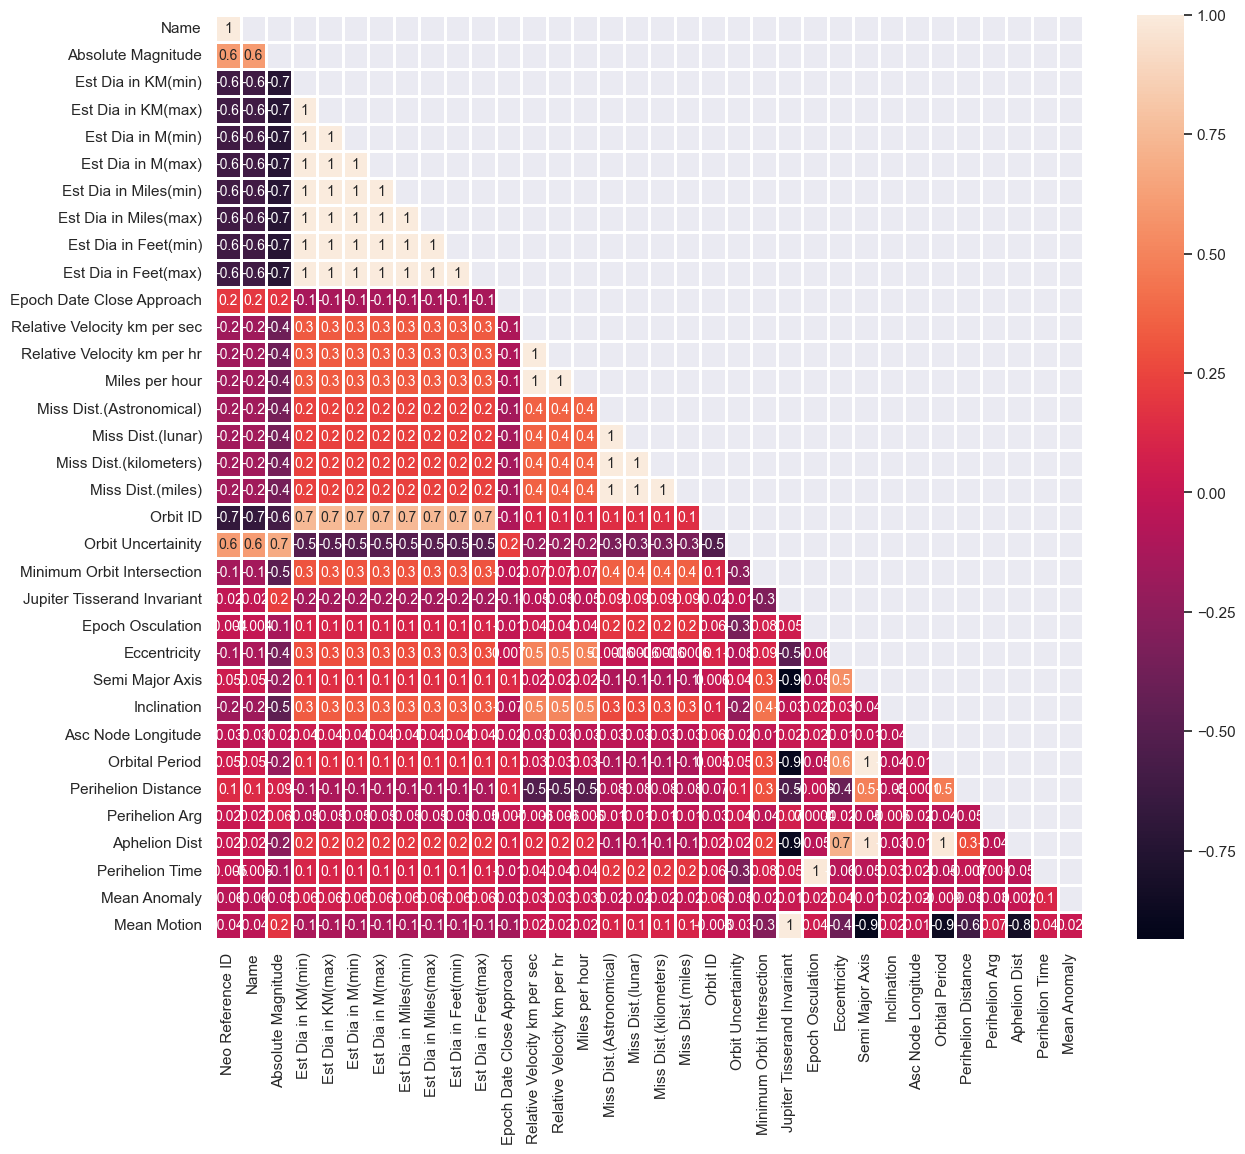

In [7]:
plt.figure(figsize=(14,12))
mask = np.triu(np.ones_like(uranus_train.corr(), dtype=bool))
sns.heatmap(uranus_train.corr().iloc[1:,:-1], mask=mask[1:,:-1], annot=True, fmt=".1g", linewidths=2.0, annot_kws={"size": 10})
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14972\2267997191.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_target = uranus_train.corrwith(target_train)


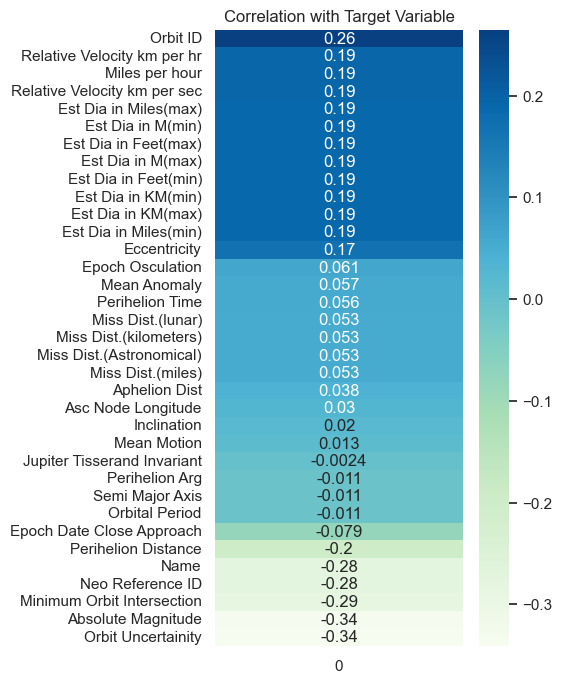

In [13]:
corr_with_target = uranus_train.corrwith(target_train)


# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)


# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

ValueError: num must be 1 <= num <= 21, not 22

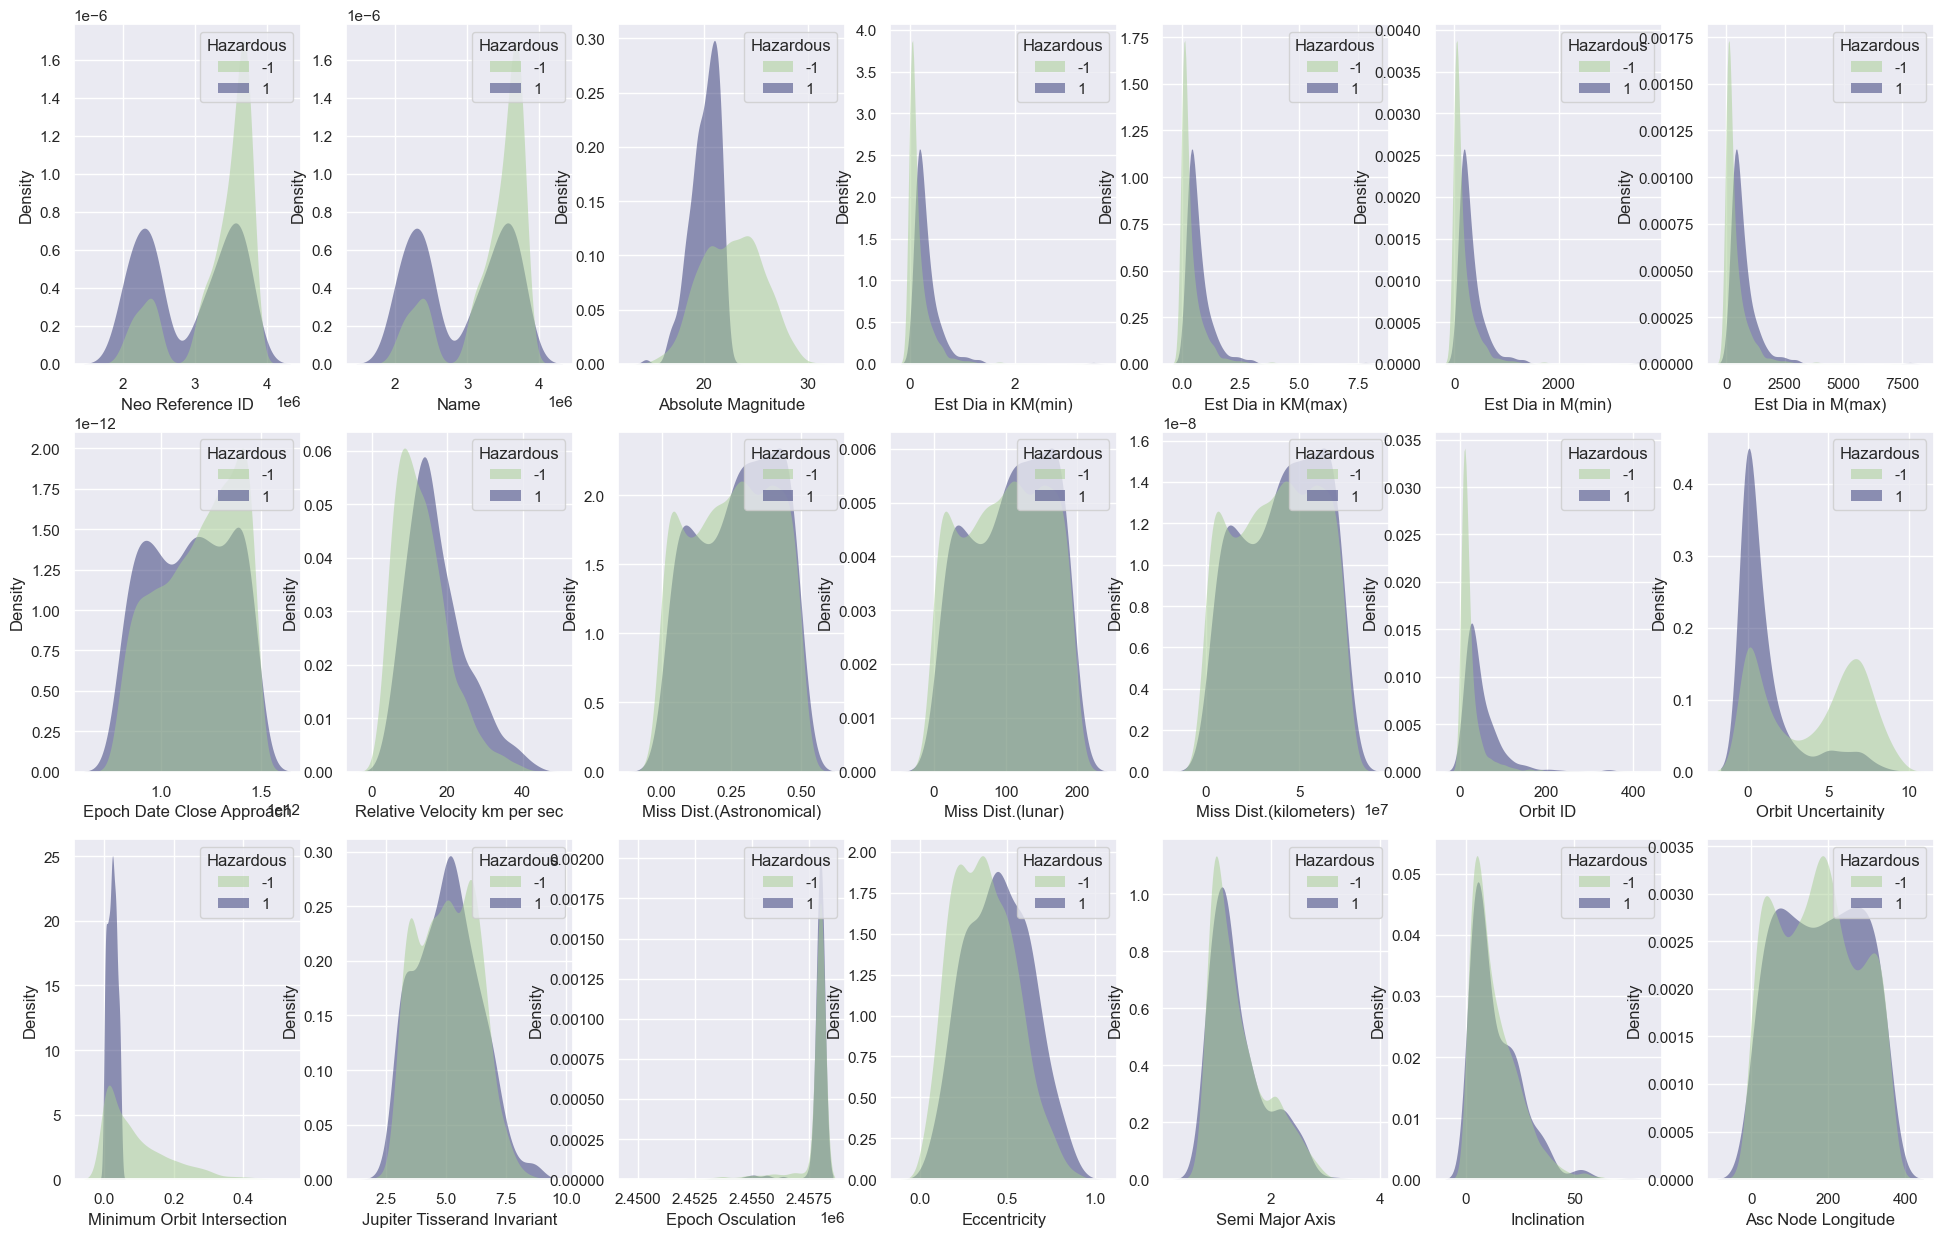

In [64]:
features = uranus_train.columns
all_data_train = uranus_train.copy()
all_data_train["Hazardous"] = target_train
plt.figure(figsize=(24, 15))
i = 1
for feature in features : 
   plt.subplot(3, 7, i)
   sns.kdeplot(
      data=all_data_train, x=feature, hue="Hazardous",
      fill=True, common_norm=False, palette="crest",
      alpha=.5, linewidth=0
   )
   i += 1
plt.tight_layout()

<AxesSubplot: title={'center': 'Genre'}>

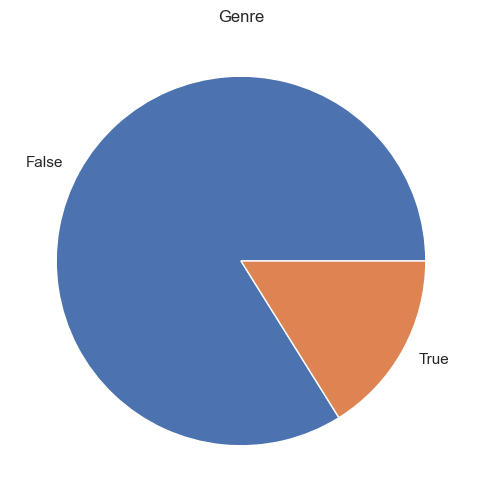

In [9]:
AC['Hazardous'].value_counts().plot.pie(figsize=(8,6), title="Genre", label='')

### data cleaning session :


In [ ]:
jupiter_copy.columns

In [ ]:
jupiter_copy.drop(columns=['Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(max)','Close Approach Date','Relative Velocity km per hr', 'Miles per hour','Miss Dist.(miles)','Orbiting Body','Orbit Determination Date','Equinox'],axis=1,inplace=True)

In [65]:
uranus_train, uranus_test, target_train, target_test = train_test_split(jupiter_copy, labels, test_size=0.3, random_state=42, stratify=labels)

uranus_train.shape, uranus_test.shape

((3280, 28), (1407, 28))

In [66]:
scaler = StandardScaler()

uranus_scaled_train = pd.DataFrame(scaler.fit_transform(uranus_train), columns=jupiter_copy.columns)

uranus_scaled_test = pd.DataFrame(scaler.transform(uranus_test), columns=jupiter_copy.columns)

In [80]:
forest_parameters = {'n_estimators' : np.arange(50, 251, 10), 'criterion' : ['gini', 'entropy', 'log_loss'], 'max_features' : ['sqrt', 'log2']}

forest = RandomForestClassifier()

clf = GridSearchCV(forest, forest_parameters, scoring='accuracy', cv=5)

clf.fit(uranus_scaled_train,target_train)

print(f"Les meilleurs paramètres sont : {clf.best_params_}")

forest=RandomForestClassifier(**clf.best_params_)

forest.fit(uranus_scaled_train,target_train)

Les meilleurs paramètres sont : {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


RandomForestClassifier(criterion='entropy', n_estimators=200)

In [84]:
yforest = forest.predict(uranus_scaled_test)

In [85]:
print("F1-score")
print("="*15)

print(f"Random Forest : {metrics.f1_score(target_test, yforest, average='macro')*100:.2f}%")

print("accuracy -score")
print("="*15)

print(f"Random Forest : {metrics.accuracy_score(target_test, yforest)*100:.2f}%")

print("\nAUC-score")
print("="*15)

print(f"Random Forest : {metrics.roc_auc_score(target_test, forest.predict_proba(target_test.to_frame()), average='macro', multi_class='ovr')*100:.2f}%")


F1-score
Random Forest : 99.61%
accuracy -score
Random Forest : 99.79%

AUC-score


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Hazardous
Feature names seen at fit time, yet now missing:
- Absolute Magnitude
- Aphelion Dist
- Asc Node Longitude
- Eccentricity
- Epoch Date Close Approach
- ...


In [78]:
target_train_test.shape

(1407,)